### Imports

In [50]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import keras as keras
from sklearn.model_selection import train_test_split

### Load dataset

In [51]:
cifar10 = keras.datasets.cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [52]:
print("Train Data: ")
print("Number of images: ",x_train.shape[0])
print(x_train.shape)    
print(y_train.shape)

print("\nTest Data: ")
print("Number of images: ",x_test.shape[0])
print(x_test.shape)
print(y_test.shape)

Train Data: 
Number of images:  50000
(50000, 32, 32, 3)
(50000, 1)

Test Data: 
Number of images:  10000
(10000, 32, 32, 3)
(10000, 1)


### 1. Prepare dataset for multiclasse

In [53]:
split = 0.8

x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=split, random_state=42, shuffle=True, stratify=y_train)


In [54]:
print("Train Data: ")
print("Number of images: ",x_train.shape[0])
print(x_train.shape)    
print(y_train.shape)

print("\nValidation Data: ")
print("Number of images: ",x_validation.shape[0])
print(x_validation.shape)
print(y_validation.shape)

print("\nTest Data: ")
print("Number of images: ",x_test.shape[0])
print(x_test.shape)
print(y_test.shape)

Train Data: 
Number of images:  10000
(10000, 32, 32, 3)
(10000, 1)

Validation Data: 
Number of images:  40000
(40000, 32, 32, 3)
(40000, 1)

Test Data: 
Number of images:  10000
(10000, 32, 32, 3)
(10000, 1)


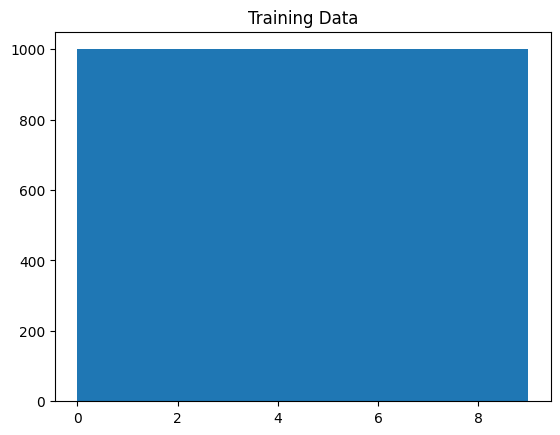

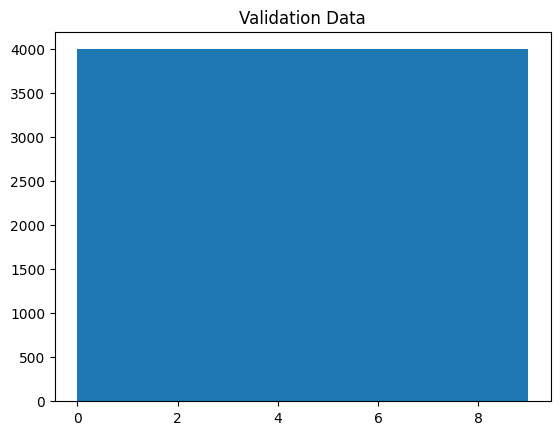

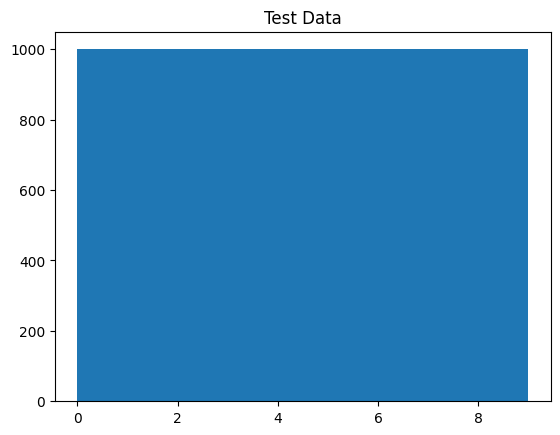

In [55]:
# Plot histograms of the data
plt.figure()
plt.hist(y_train, bins=10)
plt.title('Training Data')
plt.show()

plt.figure()
plt.hist(y_validation, bins=10)
plt.title('Validation Data')
plt.show()

plt.figure()
plt.hist(y_test, bins=10)
plt.title('Test Data')
plt.show()

In [56]:
# Save dataset for multiclasse classification
with h5py.File('dataset/dataset_cifar10_multi.hdf5', 'w') as f:
    # Calling methods to create datasets of given shapes and types
    # Saving Numpy arrays for training
    f.create_dataset('x_train', data=x_train, dtype='f')
    f.create_dataset('y_train', data=y_train, dtype='i')

    # Saving Numpy arrays for validation
    f.create_dataset('x_validation', data=x_validation, dtype='f')
    f.create_dataset('y_validation', data=y_validation, dtype='i')

    # Saving Numpy arrays for testing
    f.create_dataset('x_test', data=x_test, dtype='f')
    f.create_dataset('y_test', data=y_test, dtype='i')

### 2. Prepare dataset for binary classification

In [57]:
y_train_bin = y_train.copy()
y_validation_bin = y_validation.copy()
y_test_bin = y_test.copy()

# Consider airplane(0), automobile(1), truck(8) and ship(9) as the positive classes
y_train_bin[(y_train == 0) | (y_train == 1) | (y_train == 8) | (y_train == 9)] = 1
y_train_bin[(y_train != 1)] = 0

y_validation_bin[(y_validation == 0) | (y_validation == 1) | (y_validation == 8) | (y_validation == 9)] = 1
y_validation_bin[(y_validation != 1)] = 0

y_test_bin[(y_test == 0) | (y_test == 1) | (y_test == 8) | (y_test == 9)] = 1
y_test_bin[(y_test != 1)] = 0


[0 1 2 3 4 5 6 7 8 9]


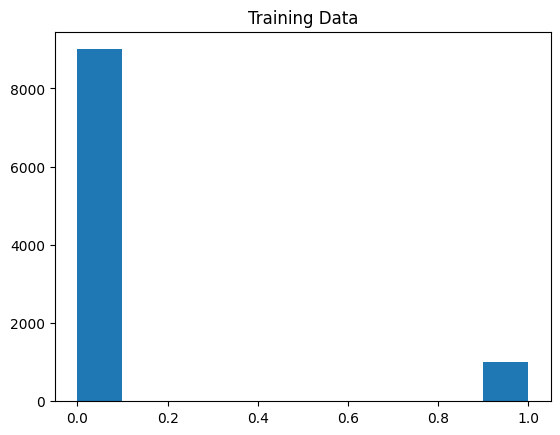

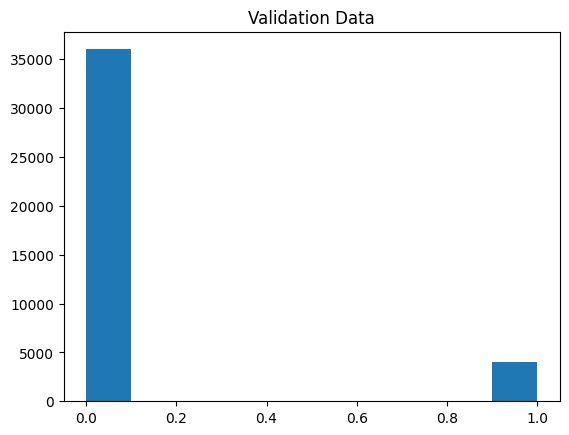

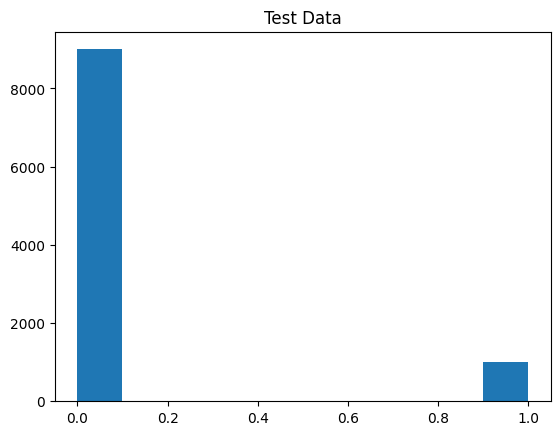

In [58]:

print(np.unique(y_train))

# Plot histograms of the data
plt.figure()
plt.hist(y_train_bin)
plt.title('Training Data')
plt.show()

plt.figure()
plt.hist(y_validation_bin)
plt.title('Validation Data')
plt.show()

plt.figure()
plt.hist(y_test_bin)
plt.title('Test Data')
plt.show()

In [59]:
# Save dataset for multiclasse classification
with h5py.File('dataset/dataset_cifar10_binary.hdf5', 'w') as f:
    # Calling methods to create datasets of given shapes and types
    # Saving Numpy arrays for training
    f.create_dataset('x_train', data=x_train, dtype='f')
    f.create_dataset('y_train', data=y_train_bin, dtype='i')

    # Saving Numpy arrays for validation
    f.create_dataset('x_validation', data=x_validation, dtype='f')
    f.create_dataset('y_validation', data=y_validation_bin, dtype='i')

    # Saving Numpy arrays for testing
    f.create_dataset('x_test', data=x_test, dtype='f')
    f.create_dataset('y_test', data=y_test_bin, dtype='i')

### Preprocess the binary dataset

In [60]:
## Test with standart scaler
## Compare data with and without standart scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train.reshape(x_train.shape[0],-1))

x_train_scaled = scaler.transform(x_train.reshape(x_train.shape[0],-1)).reshape(x_train.shape)
x_validation_scaled = scaler.transform(x_validation.reshape(x_validation.shape[0],-1)).reshape(x_validation.shape)
x_test_scaled = scaler.transform(x_test.reshape(x_test.shape[0],-1)).reshape(x_test.shape)

# Save dataset for multiclasse classification
with h5py.File('dataset/dataset_cifar10_multi_scaled.hdf5', 'w') as f:
    # Calling methods to create datasets of given shapes and types
    # Saving Numpy arrays for training
    f.create_dataset('x_train', data=x_train_scaled, dtype='f')
    f.create_dataset('y_train', data=y_train, dtype='i')

    # Saving Numpy arrays for validation
    f.create_dataset('x_validation', data=x_validation_scaled, dtype='f')
    f.create_dataset('y_validation', data=y_validation, dtype='i')

    # Saving Numpy arrays for testing
    f.create_dataset('x_test', data=x_test_scaled, dtype='f')
    f.create_dataset('y_test', data=y_test, dtype='i')


# Save dataset for binary classification
with h5py.File('dataset/dataset_cifar10_binary_scaled.hdf5', 'w') as f:
    # Calling methods to create datasets of given shapes and types
    # Saving Numpy arrays for training
    f.create_dataset('x_train', data=x_train_scaled, dtype='f')
    f.create_dataset('y_train', data=y_train_bin, dtype='i')

    # Saving Numpy arrays for validation
    f.create_dataset('x_validation', data=x_validation_scaled, dtype='f')
    f.create_dataset('y_validation', data=y_validation_bin, dtype='i')

    # Saving Numpy arrays for testing
    f.create_dataset('x_test', data=x_test_scaled, dtype='f')
    f.create_dataset('y_test', data=y_test_bin, dtype='i')

print("Data saved!")


Data saved!
